# Case Solution

To enable the operations of an FPSO, we use sensors to make sure the equipment does not fail. These sensors measure different parameters of the equipment in different setups configurations (preset 1 and preset 2) over time. We want you to investigate one piece of equipment in different time cycles to understand what characteristics and parameters of the sensors might indicate that the equipment is on the verge of failing. To solve this problem, we expect you to answer a few questions regarding the attached dataset:

1 – Calculate how many times the equipment has failed 

2 – Categorize equipment failures by setups configurations (preset 1 and preset 2)

3 – Categorize equipment failures by their nature/root cause according to parameter readings (temperature, pressure, and others)

4 – Create a model using the technique you think is most appropriate and measure its performance

5 – Analyze variable importance

## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pickle

sns.set_theme()
warnings.filterwarnings('ignore')


## Loads base

Vamos carregar as bases que serão utilizadas na análise

In [3]:
# Carrega a base dos jogos

df_data = pd.read_excel("../data/equipment_data.xlsx")
print(df_data.shape)
df_data.head()

(800, 10)


,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False


In [4]:
# Mostra colunas

df_data.columns

Index(['Cycle', 'Preset_1', 'Preset_2', 'Temperature', 'Pressure',
       'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency', 'Fail'],
      dtype='object')

## Treat Base 

In [5]:
df_data.dtypes

Cycle            int64
Preset_1         int64
Preset_2         int64
Temperature    float64
Pressure       float64
VibrationX     float64
VibrationY     float64
VibrationZ     float64
Frequency      float64
Fail              bool
dtype: object

In [6]:
# Mostrando a porcentagem de missing values em cada coluna

(df_data.isnull().sum() / len(df_data) ) * 100

Cycle          0.0
Preset_1       0.0
Preset_2       0.0
Temperature    0.0
Pressure       0.0
VibrationX     0.0
VibrationY     0.0
VibrationZ     0.0
Frequency      0.0
Fail           0.0
dtype: float64

In [7]:
# Converts Fail column 

df_data['Fail'] = df_data['Fail'].apply(lambda x: 1 if x==True else 0 )
print(df_data.shape)
df_data

(800, 10)


,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,0
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,0
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,0
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,0
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,0
...,...,...,...,...,...,...,...,...,...,...
795,796,2,6,50.469522,98.235421,151.585252,99.341380,148.838481,49.841400,1
796,797,1,4,49.985270,160.433640,110.953010,160.777175,109.917566,110.919290,1
797,798,1,4,79.777294,110.535405,61.334995,149.577811,129.463843,70.853353,1
798,799,2,8,79.360314,159.985443,61.762879,169.773831,130.213426,80.113540,1


## Data Exploration

## Question 1:

### Calculate how many times the equipment has failed 

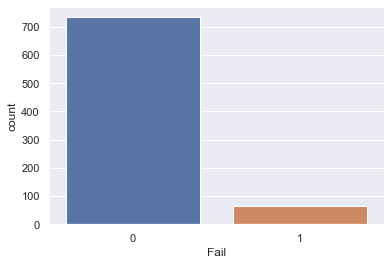

In [8]:
sns.countplot(df_data['Fail'],label="Count")
plt.show()

**Conclusion:** 

The equipament has failed 66 times. 

## Question 2: 

### Categorize equipment failures by setups configurations (preset 1 and preset 2)

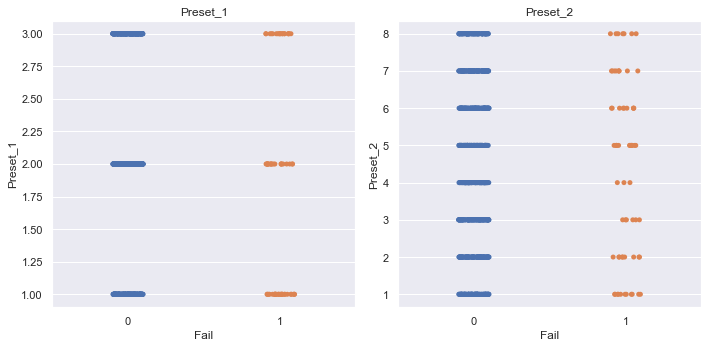

In [9]:
col_names = ['Preset_1', 'Preset_2']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, m in enumerate(col_names):
    sns.stripplot(x="Fail", y=f'{m}', data=df_data, ax=axes[i])
    #sns.countplot(hue="Fail", x=f'{m}', data=df_data, ax=axes[i])
    #ax = plt.subplot(nrows, ncols, i+1)
    axes[i].set_title(f"{m}")
plt.tight_layout()
plt.show()

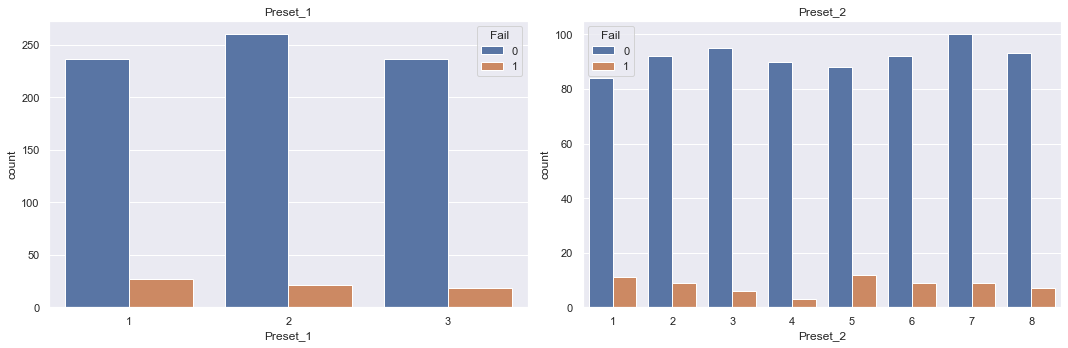

In [10]:
## Shows the histogram 

col_names = ['Preset_1', 'Preset_2']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, m in enumerate(col_names):
    sns.countplot(hue="Fail", x=f'{m}', data=df_data, ax=axes[i])
    #ax = plt.subplot(nrows, ncols, i+1)
    axes[i].set_title(f"{m}")
plt.tight_layout()
plt.show()

From these plots, we see that we cannot categorize the fail in a good way. 

## Question 3:

### Categorize equipment failures by their nature/root cause according to parameter readings (temperature, pressure, and others)

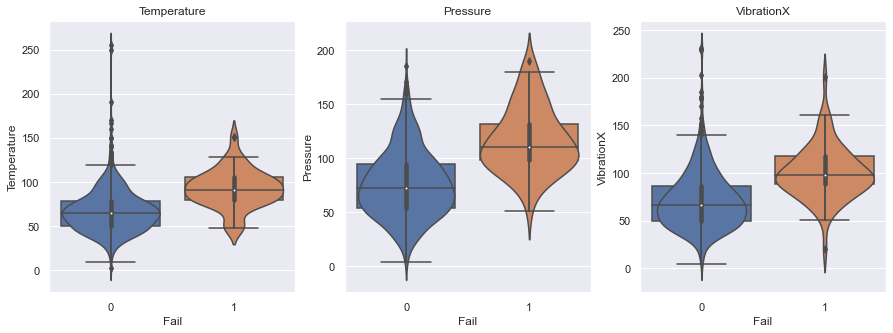

In [11]:
col_names = ['Temperature','Pressure', 'VibrationX']
n = len(col_names)
nrows = n // 3
ncols = n // nrows
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5))

for i, m in enumerate(col_names):
    sns.violinplot(x="Fail", y=f'{m}', data=df_data, ax=axes[i])
    sns.boxplot(x="Fail", y=f'{m}', data=df_data, ax=axes[i])
    axes[i].set_title(f"{m}")
plt.show()

**Conclusion:** 

From the plots, we see that the equipment starts failing at temperature above at 50 and most of the fails occurs in temperatures between 50 and 120. Under pressure, the equipment fails above 50. Similarly, under vibration on x-axis, the 
equipment starts failing above 50.

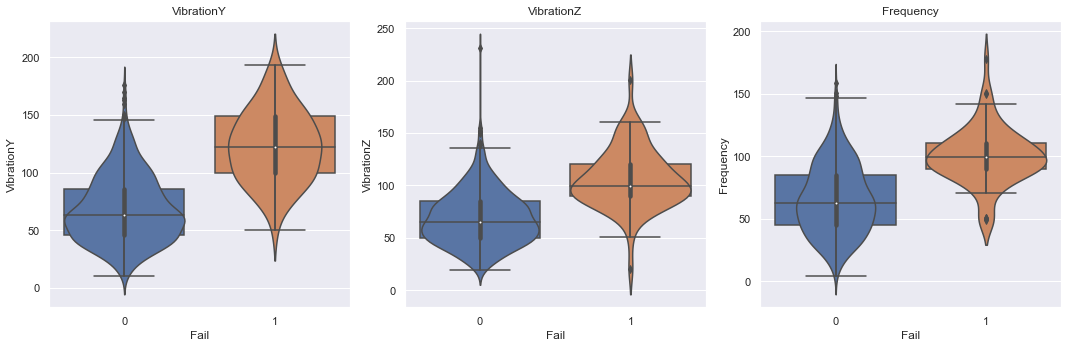

In [12]:
col_names = ['VibrationY', 'VibrationZ', 'Frequency']
n = len(col_names)
nrows = n // 3
ncols = n // nrows
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5))

for i, m in enumerate(col_names):
    sns.violinplot(x="Fail", y=f'{m}', data=df_data, ax=axes[i])
    sns.boxplot(x="Fail", y=f'{m}', data=df_data, ax=axes[i])
    #sns.stripplot(x='Fail', y=f'{m}', data=df_data, ax=axes[i])
    axes[i].set_title(f"{m}")
plt.tight_layout()
plt.show()

**Conclusion:** 

Considering the vibration o y-axis, we see that the equipment starts failing at 50 and most of the fails occurs when vibration is between 50 and 170. Under vibration on z-axis, the equipment also fails above at 50.

It is worth to summarize that, in general, when equipment fails it does when the magnitude of the parameters becomes higher than 50.

## Question 4 

### Create a model using the technique you think is most appropriate and measure its performance

In [13]:
# Let's first drop Cycle column:

df_data.drop(columns='Cycle', inplace=True)
print(df_data.shape)
df_data.head()

(800, 9)


,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,0
1,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,0
2,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,0
3,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,0
4,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,0


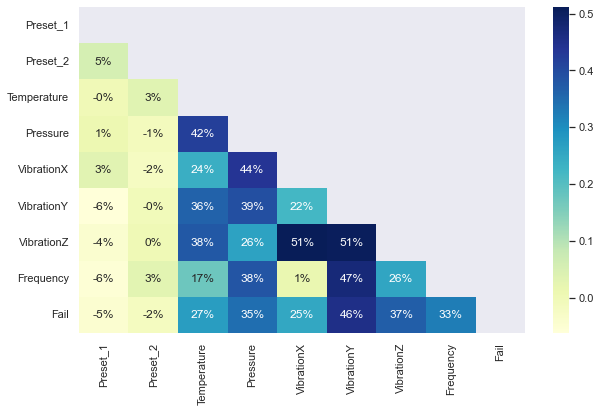

In [14]:
# Now, let's look the correlations between the variables.

plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df_data.corr()))
sns.heatmap(df_data.corr(), annot=True,  mask=mask, cmap="YlGnBu", fmt='.0%')
plt.show()

**Conclusion:** 

There are some considerable correlations between varibles, in special, for our target variable, Fail column.

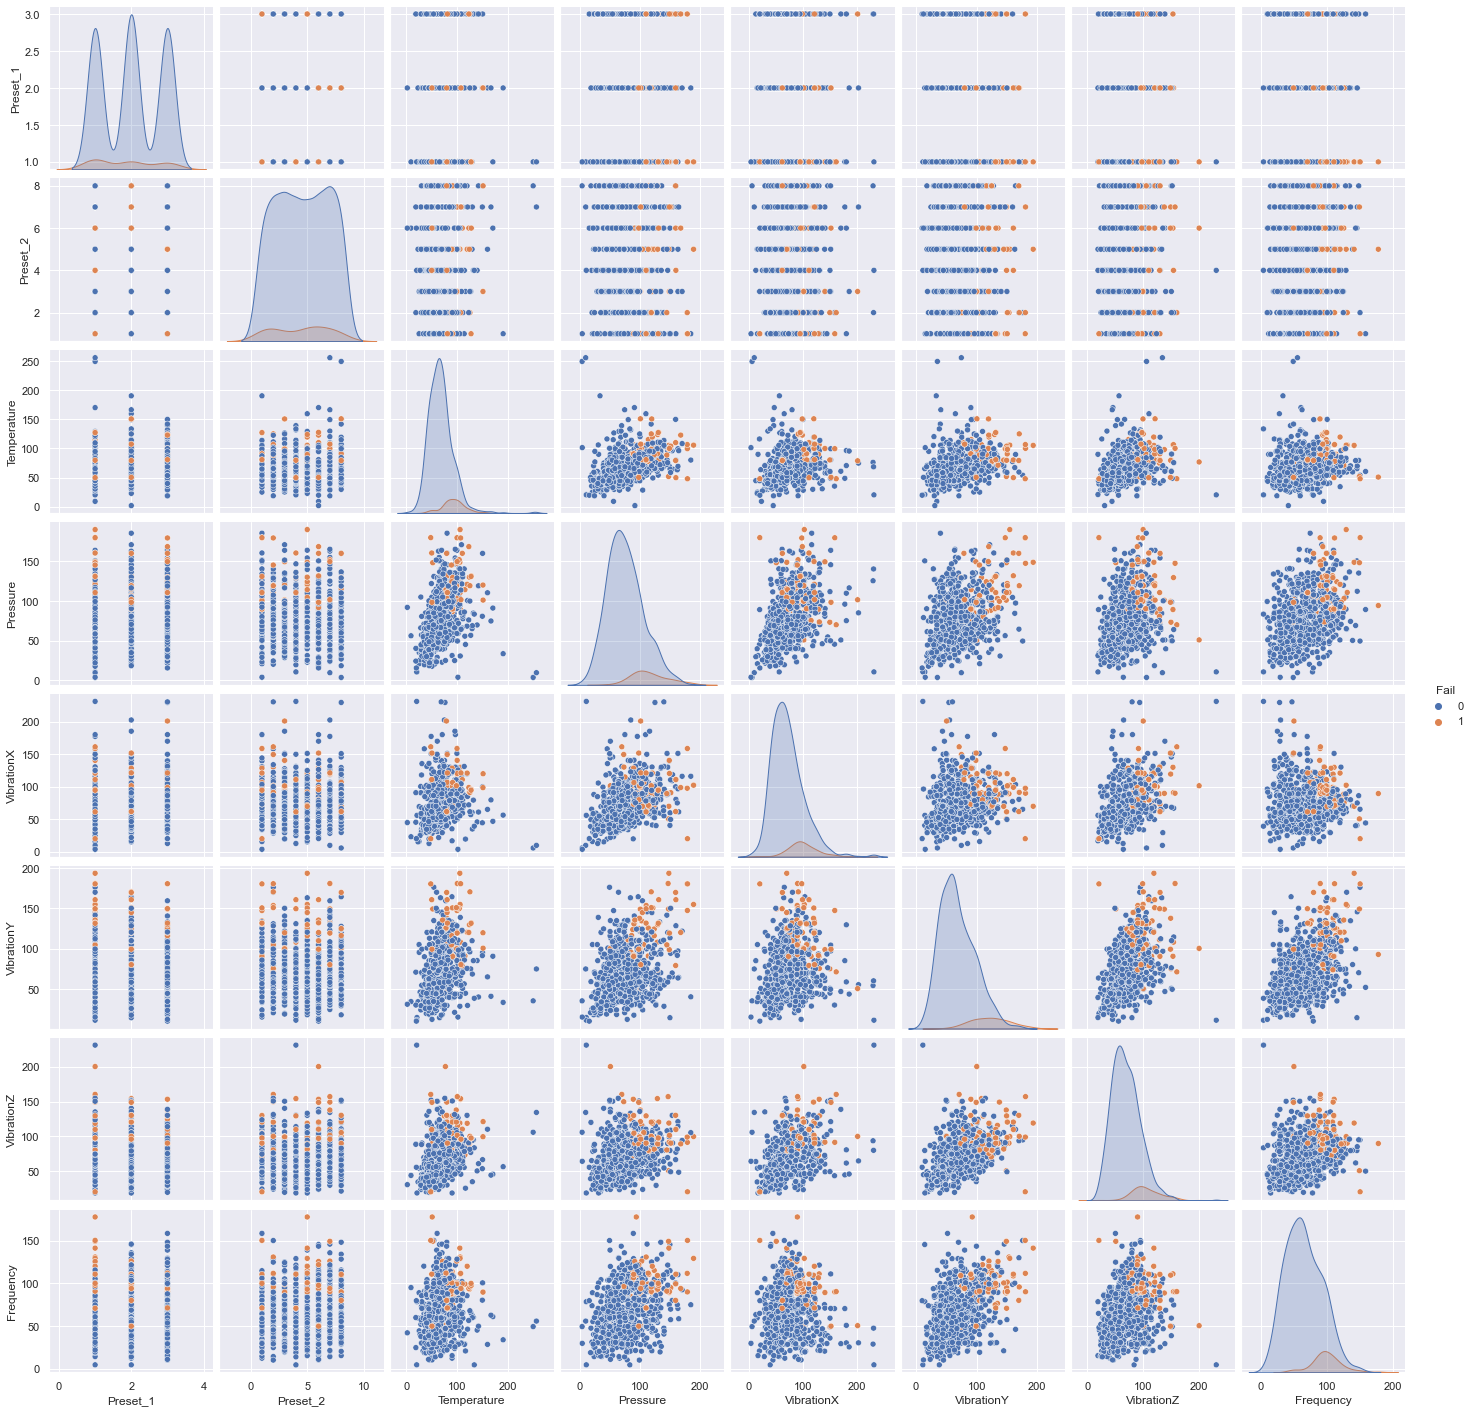

In [15]:
### Let's look the correlations between variables using plots by separating the data by Fail.

sns.pairplot(df_data, hue="Fail")
plt.show()

### Proprocessing

In [16]:
## Separating data into train and test data

X = df_data.drop(columns='Fail')
y = df_data['Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0, stratify=y)

In [17]:
print(y_train.value_counts(normalize=True).to_dict())
print('-----------------------------------------------------')
print(y_test.value_counts(normalize=True).to_dict())

{0: 0.9178571428571428, 1: 0.08214285714285714}
-----------------------------------------------------
{0: 0.9166666666666666, 1: 0.08333333333333333}


In [18]:
## Let's scale the data

scaler = StandardScaler()

X_train_scaled  = pd.DataFrame(data = scaler.fit_transform(X_train),
                              columns = X_train.columns)
X_test_scaled  = pd.DataFrame(data = scaler.fit_transform(X_test),
                              columns = X_test.columns)

X_test_scaled.head()

,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
0,-0.097727,-0.238148,-0.881849,-0.352461,-0.138487,-0.816573,-0.452419,-0.395586
1,1.136716,1.041452,-0.559363,-1.009179,-0.766613,0.167603,1.144022,-0.520420
2,1.136716,1.041452,0.239863,0.417373,1.682795,-0.516506,1.940237,-1.498354
3,1.136716,-0.238148,0.663556,1.692613,1.640178,-0.343339,0.443026,-1.341814
4,-1.332170,-1.517748,-0.123213,2.126251,-0.447440,1.357796,-0.321036,1.583891


### ML Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [20]:
dic_models = {'RandomForest':RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0),
             'XGBoost': XGBClassifier(), 
              'CatBoost':CatBoostClassifier(iterations=5, learning_rate=0.1, loss_function='CrossEntropy')}

In [21]:
def metrics(model):
    clf = dic_models[model]
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    score_precision = precision_score(y_test, y_pred)
    score_recall = recall_score(y_test, y_pred)
    score_f1 = f1_score(y_test, y_pred)
    dataframe = pd.DataFrame({'Model':[model], 'Clf':[clf], 'Precision':[score_precision], 'Recall': [score_recall], 
                 'F1_Score':[score_f1], 'y_pred':[y_pred]})
    return dataframe

#### Random Forest

In [22]:
df_rf = metrics('RandomForest')
df_rf

,Model,Clf,Precision,Recall,F1_Score,y_pred
0,RandomForest,"(DecisionTreeClassifier(criterion='entropy', m...",0.9,0.45,0.6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


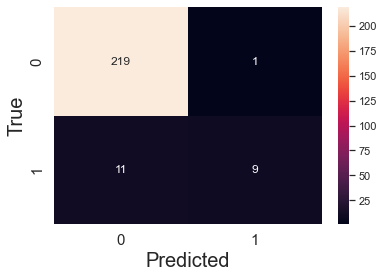

In [23]:
cm = confusion_matrix(y_true=y_test, y_pred=df_rf['y_pred'][0])

# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom') 
ax.xaxis.set_ticklabels(['0', '1'], fontsize = 15)
#ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['0', '1'], fontsize = 15)
plt.show()

#### XGBOOST

In [24]:
df_xgb = metrics('XGBoost')
df_xgb

[16:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Clf,Precision,Recall,F1_Score,y_pred
0,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.75,0.6,0.666667,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


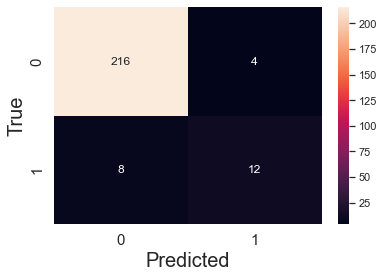

In [25]:
cm = confusion_matrix(y_true=y_test, y_pred=df_xgb['y_pred'][0])

# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom') 
ax.xaxis.set_ticklabels(['0', '1'], fontsize = 15)
#ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['0', '1'], fontsize = 15)
plt.show()

### Best Model

Once that we have an imbalance dataset (91% of No Fail and 9% of Fail), we have minimize the false negative, or maximize the recall. But we do not want by penalyzing the precision, which contains the false positive. Hence, we use the f1 score which combines recall and precision.  

In [26]:
## Let's order the model by f1 score

df_concat = pd.concat([df_rf
                      ,df_xgb]
                      ,axis=0
                     ,ignore_index=True)

df_concat.sort_values(by=['F1_Score'], ascending=False, 
                      ignore_index=True, inplace=True)
df_concat

,Model,Clf,Precision,Recall,F1_Score,y_pred
0,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.75,0.60,0.666667,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,RandomForest,"(DecisionTreeClassifier(criterion='entropy', m...",0.90,0.45,0.600000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Nota: 

The best model is XGBoost with f1 score 66.6%

## Question 5

### Analyze variable importance

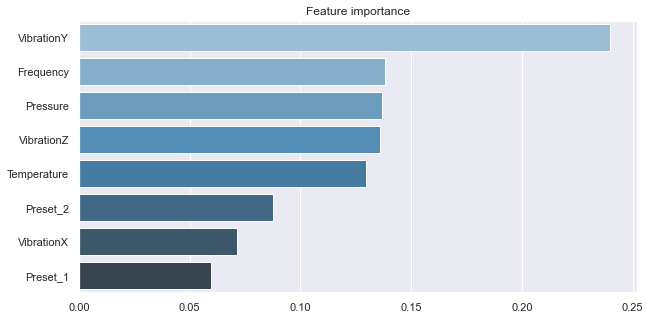

In [27]:
# Plot features importances

imp = pd.Series(data=df_concat['Clf'][0].feature_importances_, 
                index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [28]:
imp

VibrationY     0.239954
Frequency      0.138223
Pressure       0.136754
VibrationZ     0.136176
Temperature    0.129716
Preset_2       0.087889
VibrationX     0.071600
Preset_1       0.059688
dtype: float32

The vibration on y-axis plays a higher importance in the machine learning prediction. This behavior is consistent with the correlation observed with the Fail target.

#### False Negative

Let's look the profile of the data where occours the False Negative

In [29]:
df_test = pd.concat([X_test
                      ,y_test]
                      ,axis=1
                     ,ignore_index=False)

df_test['y_pred'] = df_concat['y_pred'][0]


df_FN = df_test[(df_test['y_pred']==0)&(df_test['Fail']==1)]
print(df_FN.shape)
df_FN.head()

(8, 10)


,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail,y_pred
709,1,2,88.748802,145.269712,89.354195,104.735625,80.537698,90.947445,1,0
799,3,1,80.854011,110.543701,121.032227,131.719473,90.331155,71.261717,1,0
796,1,4,49.985270,160.433640,110.953010,160.777175,109.917566,110.919290,1,0
414,3,3,78.862065,101.454563,200.749598,50.481820,100.000843,50.456673,1,0
428,1,7,52.005529,148.171041,50.590947,149.246393,50.799207,149.495691,1,0


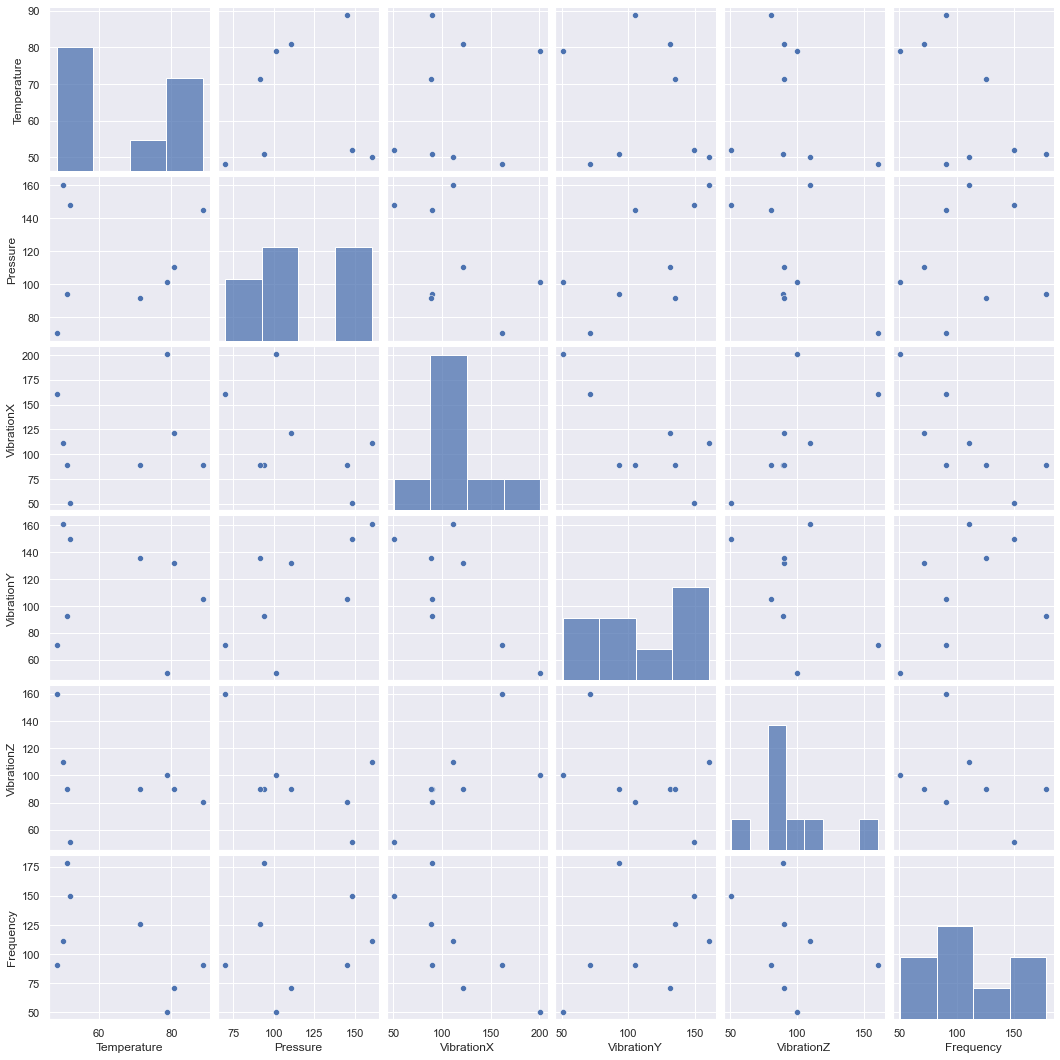

In [30]:
sns.pairplot(df_FN,  vars=["Temperature", "Pressure", "VibrationX", "VibrationY", "VibrationZ", "Frequency"])
plt.show()

#### Save Model
In addition, we save the model, as follows.

In [32]:
pickle.dump(df_concat['Clf'][0], open('../model/model.pkl', 'wb'))